In [2]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from scipy import stats
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('armac_csv.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [5]:
dataframe.head()

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [7]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [9]:
# create and fit the GRU network
model = Sequential()
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
2441/2441 - 3s - loss: 0.0128
Epoch 2/100
2441/2441 - 3s - loss: 0.0099
Epoch 3/100
2441/2441 - 2s - loss: 0.0099
Epoch 4/100
2441/2441 - 3s - loss: 0.0098
Epoch 5/100
2441/2441 - 2s - loss: 0.0100
Epoch 6/100
2441/2441 - 3s - loss: 0.0098
Epoch 7/100
2441/2441 - 2s - loss: 0.0098
Epoch 8/100
2441/2441 - 2s - loss: 0.0098
Epoch 9/100
2441/2441 - 3s - loss: 0.0098
Epoch 10/100
2441/2441 - 3s - loss: 0.0097
Epoch 11/100
2441/2441 - 2s - loss: 0.0098
Epoch 12/100
2441/2441 - 3s - loss: 0.0097
Epoch 13/100
2441/2441 - 2s - loss: 0.0097
Epoch 14/100
2441/2441 - 4s - loss: 0.0098
Epoch 15/100
2441/2441 - 2s - loss: 0.0097
Epoch 16/100
2441/2441 - 4s - loss: 0.0098
Epoch 17/100
2441/2441 - 2s - loss: 0.0097
Epoch 18/100
2441/2441 - 3s - loss: 0.0097
Epoch 19/100
2441/2441 - 2s - loss: 0.0098
Epoch 20/100
2441/2441 - 4s - loss: 0.0097
Epoch 21/100
2441/2441 - 2s - loss: 0.0096
Epoch 22/100
2441/2441 - 4s - loss: 0.0097
Epoch 23/100
2441/2441 - 2s - loss: 0.0097
Epoch 24/100
2441/24

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [11]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [12]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 2.58 RMSE
Test Score: 2.50 RMSE


In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [14]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


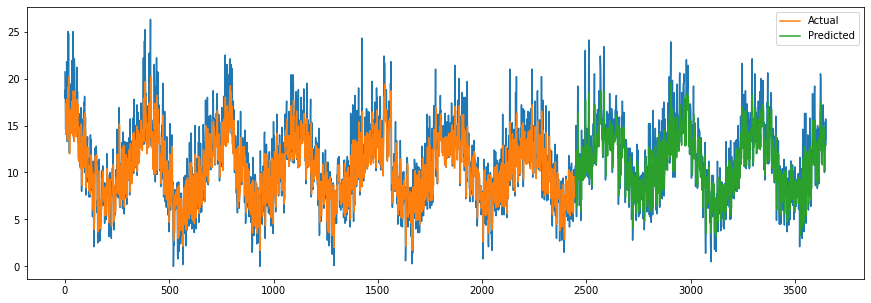

In [15]:
# plot baseline and predictions
#plt.legend(trainPredictPlot,label='Actual')
#plt.legend(testPredictPlot,label='Prediction')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,label='Actual')
plt.plot(testPredictPlot,label='Predicted')
plt.legend()
plt.gcf().set_size_inches(15,5)

plt.show()